In [1]:
from __future__ import print_function, division
import torch

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import os

from matplotlib.pyplot import imshow
from PIL import Image

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [3]:
img_train_path = os.path.abspath('../data/train_images/')
img_test_path = os.path.abspath('../data/test_images/')
csv_train_path = os.path.abspath('../data/train.txt')

In [4]:
df = pd.read_csv(csv_train_path, header=None, sep=' ')
df[0] = df[0].str.replace('../data/train_images/','')
df.head()

,0,1
0,4362.png,1
1,3355.png,0
2,2334.png,3
3,764.png,3
4,3551.png,4


In [7]:
INPUT_DIR = '../data/train_images/'

def plot_images_for_filenames(filenames, labels, rows=5):
    imgs = [plt.imread(f'{INPUT_DIR}{filename}') for filename in filenames]
    
    return plot_images(imgs, labels, rows)
    
        
def plot_images(imgs, labels, rows=5):
    # Set figure to 13 inches x 8 inches
    figure = plt.figure(figsize=(13, 8))

    cols = len(imgs) // rows + 1

    for i in range(len(imgs)):
        subplot = figure.add_subplot(rows, cols, i + 1)
        subplot.axis('Off')
        if labels:
            subplot.set_title(labels[i], fontsize=16)
        plt.imshow(imgs[i])

        
def show_Alien(imgs, labels, per_row=2):
    n         = len(imgs)
    rows      = (n + per_row - 1)//per_row
    cols      = min(per_row, n)
    fig, axes = plt.subplots(rows,cols, figsize=(24//per_row*cols,24//per_row*rows))
    for ax in axes.flatten(): 
        ax.axis('off')
    for i,(img,ax) in enumerate(zip(imgs, axes.flatten())): 
        ax.set_title(labels[i], fontsize=20)
        ax.imshow(img.convert('RGB'))

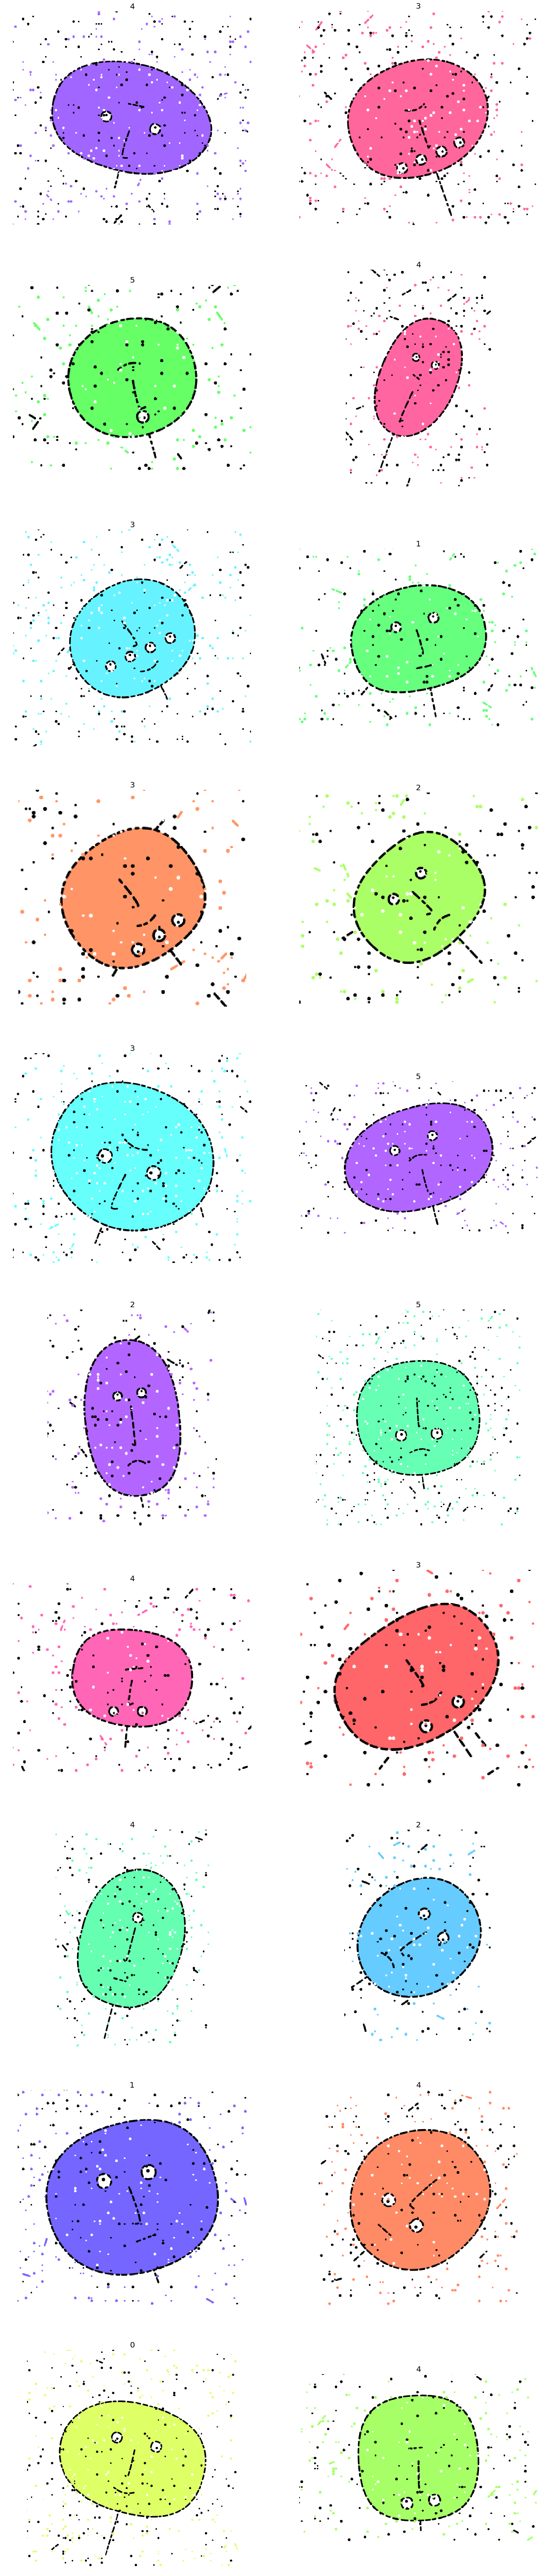

In [8]:
from PIL import Image as pil_image

rand_rows = df.sample(frac=1.)[:20]
imgs_list = list(rand_rows[0])
labels = list(rand_rows[1])

imgs = [pil_image.open(INPUT_DIR + str(p)) for p in imgs_list]

show_Alien(imgs, labels)